# What is linear regression? What do the terms p-value, coefficient, and r2 value mean? What is the significance of each of these components?

When we want to predict a variable (y) based on an independant variable (x). For instance X is the area of an apartment and y is its price. If we assume that their is a linear corelation between X and y, We can write

y = a + b.X

where a is a constant and b is the coefficient. 

When we do hypothesis testing in regression cases, the null hypothesis is that there is no relation between the independent (X) and dependent (y) variable. p-value shows the prbobabilty of seeing such values of X and y by chance. The lower the p-value, the stronger evidence that there is a relation between x and y and what we are seeing in not just by chance. Usually we set a 5% level, so 
that we have a 95% confidentiality that our variable is relevant. 

## Relation between apartment area and price

The data that we have here is the area of some apartments and their prices. We want to check if there is a relation between price and the area.

Let's assume alpha of 0.05.

### use Stat model


In [34]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

import statsmodels.api as sm
from sklearn.linear_model import LinearRegression

from sklearn.metrics import mean_squared_error, r2_score

In [3]:
path = 'C:\\Users\\somfl\\Documents\\GitHub\\Statistics\\real_estate_price_size.csv'
df = pd.read_csv(path)
df

,price,size
0,234314.144,643.09
1,228581.528,656.22
2,281626.336,487.29
3,401255.608,1504.75
4,458674.256,1275.46
...,...,...
95,252460.400,549.80
96,310522.592,1037.44
97,383635.568,1504.75
98,225145.248,648.29


Let's plot a scatter pplot and see price vs area

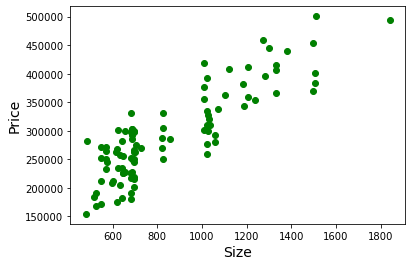

In [53]:
plt.scatter(df['size'], df['price'],color='g')
plt.xlabel('Size',fontsize=14)
plt.ylabel('Price',fontsize=14)
plt.show()

In [37]:
y = df['price']
x1 = df['size']
x = sm.add_constant(x1)
results = sm.OLS(y,x).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.745
Model:                            OLS   Adj. R-squared:                  0.742
Method:                 Least Squares   F-statistic:                     285.9
Date:                Sun, 16 Jan 2022   Prob (F-statistic):           8.13e-31
Time:                        19:20:08   Log-Likelihood:                -1198.3
No. Observations:                 100   AIC:                             2401.
Df Residuals:                      98   BIC:                             2406.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1.019e+05   1.19e+04      8.550      0.000    7.83e+04    1.26e+05
size         223.1787     13.199     16.909      0.000     196.986     249.371
==============================================================================
Omnibus:                        6.262   Durbin-Watson:                   2.267
Prob(Omnibus):                  0.044   Jarque-Bera (JB):                2.938
Skew:                           0.117   Prob(JB):                        0.230
Kurtosis:                       2.194   Cond. No.                     2.75e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.75e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In the above summary tabel:
    
F-statistic is the ratio of mean squared error of the model to the mean squared error of residuals. It determines the overall significance of the model.

t is the value of t-statistic. It is the ratio of the difference between the estimated and hypothesised value of a parameter, to the standard error

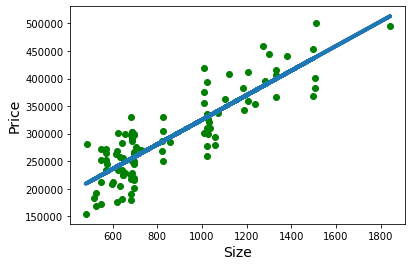

In [52]:
plt.scatter(df['size'], df['price'],color='g')
df['yhat'] = 101900 + 223.1787*df['size']
plt.plot(df['size'], yhat, lw=4)
plt.xlabel('Size',fontsize=14)
plt.ylabel('Price',fontsize=14)
plt.show()

### use sklearn

In [28]:
X = df['size'].values
X = X[:, np.newaxis]
y = df['price'].values

model = LinearRegression()
reg = model.fit(X, y)

In [55]:
y_pred = reg.predict(X)

In [58]:
print('Coefficient is {}'.format(reg.coef_))
print('Intercept is {}'.format(reg.intercept_))

print("Mean squared error: %.2f" % mean_squared_error(y, y_pred))
# The coefficient of determination: 1 is perfect prediction
print("R2 is: %.2f" % r2_score(y, y_pred))


Coefficient is [223.17874259]
Intercept is 101912.60180122912
Mean squared error: 1500320708.66
R2 is: 0.74
